In [2]:
import numpy as np
import scipy.fftpack as fourier
import matplotlib
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import pyaudio as pa 
import struct 
import statsmodels.api as sm
from scipy.signal import find_peaks

In [3]:
#Definicion de la primera frecuencia de cada nota musical y del array con los nombre de las notas.

hzInicialFa = 21.826            
hzInicialFaS = 23.125           
hzInicialSol = 24.50            
hzInicialSolS = 25.96
hzInicialLa = 27.50
hzInicialLaS = 29.14
hzInicialSi = 30.87
hzInicialDo = 32.7              
hzInicialDoS = 34.65
hzInicialRe = 36.71
hzInicialReS = 38.89
hzInicialMi = 41.2

hzIniciales = np.array([hzInicialFa, hzInicialFaS, hzInicialSol, hzInicialSolS, hzInicialLa, hzInicialLaS, hzInicialSi, hzInicialDo, hzInicialDoS, hzInicialRe, hzInicialReS, hzInicialMi], dtype=float)

nombreNota = np.array(['Fa','Fa#','Sol','Sol#','La','La#','Si','Do','Do#','Re','Re#','Mi'], dtype = str)

In [4]:
#Funciones para conseguir los 0.05 anteriores y los 0.05 seguientes de un Hz

def nAnteriores(Hz):
    vAnteriores = np.array([], dtype=float)
    for i in range(5):
        valor = 5/10 - i/10
        vAnteriores = np.append(vAnteriores, (Hz - valor))
    return vAnteriores

def nSiguientes(Hz):
    vSiguientes = np.array([], dtype=float)
    for i in range(5):
        valor = i/10 + 1/10
        vSiguientes = np.append(vSiguientes, (Hz + valor))
    return vSiguientes

#Funciones para acumular los valores anteiores y siguientes.

def vAnteriores(Hz):
    valoresAnteriores = np.array([], dtype=float)
    valoresAnteriores = np.append(valoresAnteriores, nAnteriores(Hz))
    valoresAnteriores = np.append(valoresAnteriores, Hz)
    return valoresAnteriores

def vSiguientes(Hz):
    valoresSiguientes = np.array([], dtype=float)
    valoresSiguientes = np.append(valoresSiguientes, nSiguientes(Hz))
    return valoresSiguientes

#Funcion para el guardado automatico de las frecuencias en un array.

def LlenadoAutomaticoDeHz(Hz):
    allHz = np.array([], dtype=float)
    allHz = np.append(allHz, vAnteriores(Hz))
    allHz = np.append(allHz, vSiguientes(Hz))
    return allHz

def RedondeoAutomatico(Hz):
    valores = np.array([], dtype=float)
    for i in range(len(Hz)):
        valores = np.append(valores, round(Hz[i], 3))
    return valores

In [5]:
#Frecuencias de Fa, Fa# y Sol
FaFaSSolHz = np.array([], dtype=float)
for i in range(3):                                                          #Tomo las notas Fa, Fa# y Sol
    for j in range(9):                                                      
        Hz2 = hzIniciales[i] * (2 ** j)                                     #Multiplico por 2 para que sean las notas de la octava superior
        FaFaSSolHz = np.append(FaFaSSolHz, LlenadoAutomaticoDeHz(Hz2))
        FaFaSSolHz = RedondeoAutomatico(FaFaSSolHz)

#Frecuencias de Sol#, La, La#, Si, Do, Do#, Re, Re#, Mi
allHz = np.array([], dtype=float)
for i in range(3, 12):
    for j in range(8):
        Hz2 = hzIniciales[i] * (2 ** j)
        allHz = np.append(allHz, LlenadoAutomaticoDeHz(Hz2))
        allHz = RedondeoAutomatico(allHz)



In [6]:
#Ingreso de las frecuencias en los array de las notas Fa, Fa#, Sol
# 99 valores en total para cada nota.

total = 99

FaHz = np.array([], dtype=float)
for i in range(total):
    FaHz = np.append(FaHz, FaFaSSolHz[i])

FaSHz = np.array([], dtype=float)
for i in range(total, total*2):
    FaSHz = np.append(FaSHz, FaFaSSolHz[i])

SolHz = np.array([], dtype=float)
for i in range(total*2, total*3):
    SolHz = np.append(SolHz, FaFaSSolHz[i])

#Ingreso de las frecuencias en los array de las notas Sol#, La, La#, Si, Do, Do#, Re, Re#, Mi
# 88 valores en total para cada nota.

total2 = 88

SolSHz = np.array([], dtype=float)
for i in range(total2):
    SolSHz = np.append(SolSHz, allHz[i])

LaHz = np.array([], dtype=float)
for i in range(total2, total2*2):
    LaHz = np.append(LaHz, allHz[i])

LaSHz = np.array([], dtype=float)
for i in range(total2*2, total2*3):
    LaSHz = np.append(LaSHz, allHz[i])

SiHz = np.array([], dtype=float)
for i in range(total2*3, total2*4):
    SiHz = np.append(SiHz, allHz[i])

DoHz = np.array([], dtype=float)
for i in range(total2*4, total2*5):
    DoHz = np.append(DoHz, allHz[i])

DoSHz = np.array([], dtype=float)
for i in range(total2*5, total2*6):
    DoSHz = np.append(DoSHz, allHz[i])

ReHz = np.array([], dtype=float)
for i in range(total2*6, total2*7):
    ReHz = np.append(ReHz, allHz[i])

ReSHz = np.array([], dtype=float)
for i in range(total2*7, total2*8):
    ReSHz = np.append(ReSHz, allHz[i])

MiHz = np.array([], dtype=float)
for i in range(total2*8, total2*9):
    MiHz = np.append(MiHz, allHz[i])

In [6]:
#.---.HACIA ARRIBA ES LA DEFINICION DE LOS HZ Y SU ALMACENAMIENTO EN SUS RESPECTIVAS NOTAS MUSICALES.---.#

In [7]:
print(ReHz[0])
print("{:.3f}".format(ReHz[0]))
aux = np.array([], dtype=float)
for i in range(len(ReHz)):
    valor = "{:.3f}".format(ReHz[i])
    aux = np.append(aux, valor)
print(aux)

36.21
36.210
['36.210' '36.310' '36.410' '36.510' '36.610' '36.710' '36.810' '36.910'
 '37.010' '37.110' '37.210' '72.920' '73.020' '73.120' '73.220' '73.320'
 '73.420' '73.520' '73.620' '73.720' '73.820' '73.920' '146.340' '146.440'
 '146.540' '146.640' '146.740' '146.840' '146.940' '147.040' '147.140'
 '147.240' '147.340' '293.180' '293.280' '293.380' '293.480' '293.580'
 '293.680' '293.780' '293.880' '293.980' '294.080' '294.180' '586.860'
 '586.960' '587.060' '587.160' '587.260' '587.360' '587.460' '587.560'
 '587.660' '587.760' '587.860' '1174.220' '1174.320' '1174.420' '1174.520'
 '1174.620' '1174.720' '1174.820' '1174.920' '1175.020' '1175.120'
 '1175.220' '2348.940' '2349.040' '2349.140' '2349.240' '2349.340'
 '2349.440' '2349.540' '2349.640' '2349.740' '2349.840' '2349.940'
 '4698.380' '4698.480' '4698.580' '4698.680' '4698.780' '4698.880'
 '4698.980' '4699.080' '4699.180' '4699.280' '4699.380']


In [8]:
HzMaximo = 30.87
posicionHz = np.where(allHz==HzMaximo)[0][0]
print(posicionHz)
print(len(allHz))
print(allHz[posicionHz])

269
792
30.87


In [142]:
frecuencia = 490
contenedorDeFrecuencias = np.array([10, 12, 100, 500], dtype=float)
aproximacion = contenedorDeFrecuencias.flat[np.abs(contenedorDeFrecuencias - frecuencia).argmin()]
print(aproximacion)
diferencia = frecuencia - aproximacion
print(diferencia)
if diferencia > 10 : print(frecuencia)
elif diferencia < -10 : print(frecuencia)
else : print("es un do D:")

500.0
-10.0
es un do D:


In [143]:
FaFaSSolHz.flat[np.abs(allHz - 440).argmin()]

185.0

In [7]:
def determinarNotaMusical(HzMaximo):

    posicionHz = np.where(FaFaSSolHz==HzMaximo)[0][0]

    if (HzMaximo in FaHz): print( "Es un Fa en: ", FaFaSSolHz[posicionHz], "Hz")
    elif (HzMaximo in FaSHz): print( "Es un Fa# en: ", FaFaSSolHz[posicionHz], "Hz")
    elif (HzMaximo in SolHz): print( "Es un Sol en: ", FaFaSSolHz[posicionHz], "Hz")

def determinarNotaMusical2(HzMaximo):

    posicionHz = np.where(allHz==HzMaximo)[0][0]

    if (HzMaximo in SolSHz): print( "Es un Sol# en: ", allHz[posicionHz], "Hz")
    elif (HzMaximo in LaHz): print( "Es un La en: ", allHz[posicionHz], "Hz")
    elif (HzMaximo in LaSHz): print( "Es un La# en: ", allHz[posicionHz], "Hz")
    elif (HzMaximo in SiHz): print( "Es un Si en: ", allHz[posicionHz], "Hz")
    elif (HzMaximo in DoHz): print( "Es un Do en: ", allHz[posicionHz], "Hz")
    elif (HzMaximo in DoSHz): print( "Es un Do# en: ", allHz[posicionHz], "Hz")
    elif (HzMaximo in ReHz): print( "Es un Re en: ", allHz[posicionHz], "Hz")
    elif (HzMaximo in ReSHz): print( "Es un Re# en: ", allHz[posicionHz], "Hz")
    elif (HzMaximo in MiHz): print( "Es un Mi en: ", allHz[posicionHz], "Hz")

In [8]:
def aproximar (Frecuencias, HzMaximo):
    aproximacion = Frecuencias.flat[np.abs(Frecuencias - HzMaximo).argmin()]
    aproximacion = np.round(aproximacion, 3)
    return aproximacion

In [79]:
#4698.88
f = 4695.88
f2 = 4700.88
aprox = aproximar(FaFaSSolHz, f)
aprox2 = aproximar(allHz, f2)
print(aprox)
print(aprox2)

diferencia = f - aprox
diferencia2 = f2 - aprox2
print("d1: ", diferencia)
print("d2: ", diferencia2)

if diferencia < 5 and diferencia > -5:
    if diferencia2 < 5 and diferencia2 > -5:
        if diferencia < diferencia2:
            print("toy en el 1er IF")
            determinarNotaMusical(aprox)
        elif diferencia > diferencia2:
            print("toy en el 2do IF")
            determinarNotaMusical2(aprox2)
        else:
            print("toy en el 3er IF")
            determinarNotaMusical(aprox)
            determinarNotaMusical2(aprox2)
    else: determinarNotaMusical(aprox)
elif diferencia2 < 5 and diferencia2 > -5:
    determinarNotaMusical2(aprox2)
else:
    print(aprox, "Hz")
    print(aprox2, "Hz")



if diferencia < diferencia2 :
    if diferencia > 1.5 : 
        print(aprox, "Hz")
    elif diferencia < -2 : 
        print(aprox, "Hz")
    else : determinarNotaMusical(aprox)
elif diferencia2 < diferencia :
    if diferencia2 > 2 : 
        print(aprox2, "Hz")
    elif diferencia2 < 2 : 
        print(aprox2, "Hz")
    else : determinarNotaMusical2(aprox2)
else: 
    determinarNotaMusical(aprox)
    determinarNotaMusical2(aprox2)

5586.956
4699.38
d1:  -891.076
d2:  1.5
Es un Re en:  4699.38 Hz
5586.956 Hz


In [11]:
def verificarDiferencia (diferencia, diferencia2, aproximacion, aproximacion2):
    resp, resp2 = False, False

    if diferencia < 2 and diferencia > -2:
        resp = True
    else: resp = False
    if diferencia2 < 2 and diferencia2 > -2:
        resp2 = True
    else: resp2 = False
    if resp and resp2 : 
        if diferencia < diferencia2 :
            determinarNotaMusical(aproximacion)
        elif diferencia > diferencia2 :
            determinarNotaMusical2(aproximacion2)
        else: 
            determinarNotaMusical(aproximacion)
            determinarNotaMusical2(aproximacion2)
    elif resp: determinarNotaMusical(aproximacion)
    elif resp2: determinarNotaMusical2(aproximacion2)
    else : 
        print(aproximacion, "Hz")
        print(aproximacion2, "Hz")


In [9]:
def dentroDelRango (diferencia):
    if diferencia  >= 0 and diferencia < 5:
        return(True)
    else: return(False)

def elegirAproximacion(diferencia, diferencia2):
    if diferencia < diferencia2 :
        return(1)
    elif diferencia > diferencia2 :
        return(2)
    else: return(3)

def determinar(aproximacionElegida, resp, resp2, aproximacion, aproximacion2):
    if aproximacionElegida == 1:
        validarDeterminacion(aproximacion, resp)
    elif aproximacionElegida == 2:
        validarDeterminacion2(aproximacion2, resp2)
    elif aproximacionElegida == 3:
        validarDeterminacion(aproximacion, resp)
    else:
        print(aproximacion, "Error")

def validarDeterminacion(aproximacion, resp):
    if resp:
        determinarNotaMusical(aproximacion)
    else:
        print(aproximacion, "Hz 1erprint")

def validarDeterminacion2(aproximacion2, resp2):
    if resp2:
        determinarNotaMusical2(aproximacion2)
    else:
        print(aproximacion2, "Hz 2doprint")

6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1erprint
6272.5 Hz 1e

KeyboardInterrupt: 

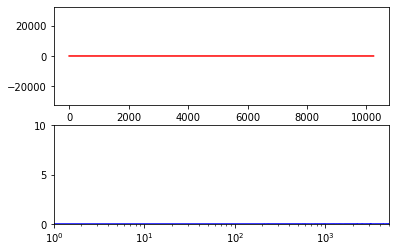

In [11]:
matplotlib.use('TkAgg')

FRAMES = 1024*10                                   # Tamaño del paquete a procesar
FORMAT = pa.paInt16                               # Formato de lectura INT 16 bits
CHANNELS = 1
Fs = 48000                                        # Frecuencia de muestreo típica para audio

p = pa.PyAudio()

stream = p.open(                                  # Abrimos el canal de audio con los parámeteros de configuración
    format = FORMAT,
    channels = CHANNELS,
    rate = Fs,
    input=True,
    output=True,
    frames_per_buffer=FRAMES
)

# Creamos una gráfica con 2 subplots y configuramos los ejes

fig, (ax,ax1) = plt.subplots(2)

x_audio = np.arange(0,FRAMES,1)
x_fft = np.linspace(0, Fs, FRAMES)
line, = ax.plot(x_audio, np.random.rand(FRAMES),'r')
line_fft, = ax1.semilogx(x_fft, np.random.rand(FRAMES), 'b')

ax.set_ylim(-32500,32500)
ax.ser_xlim = (0,FRAMES)
Fmin = 1
Fmax = 5000
ax1.set_xlim(Fmin,Fmax)

fig.show()

F = (Fs/FRAMES)*np.arange(0,FRAMES//2)                 # Creamos el vector de frecuencia para encontrar la frecuencia dominante

while True:

    data = stream.read(FRAMES)                         # Leemos paquetes de longitud FRAMES
    dataInt = struct.unpack(str(FRAMES) + 'h', data)   # Convertimos los datos que se encuentran empaquetados en bytes

    line.set_ydata(dataInt)                            # Asignamos los datos a la curva de la variación temporal

    M_gk = abs(fourier.fft(dataInt)/FRAMES)            # Calculamos la FFT y la Magnitud de la FFT del paqute de datos

    ax1.set_ylim(0,np.max(M_gk+10)) 
    line_fft.set_ydata(M_gk)                           # Asigmanos la Magnitud de la FFT a la curva del espectro 

    M_gk = M_gk[0:FRAMES//2]                           # Tomamos la mitad del espectro para encontrar la Frecuencia Dominante
    Posm = np.where(M_gk == np.max(M_gk))
    HzMaximo = F[Posm]                                   # Encontramos la frecuencia que corresponde con el máximo de M_gk
    HzMaximo = np.round(HzMaximo, 3)                    # Redondeamos la frecuencia encontrada a 3 decimales

    aproximacion = aproximar(FaFaSSolHz, HzMaximo)
    aproximacion2 = aproximar(allHz, HzMaximo)

    diferencia = abs(HzMaximo - aproximacion)
    diferencia2 = abs(HzMaximo - aproximacion2)
    diferencia = np.round(diferencia, 3)
    diferencia2 = np.round(diferencia2, 3)

    resp = dentroDelRango(diferencia)
    resp2 = dentroDelRango(diferencia2)

    aproximacionElegida = elegirAproximacion(diferencia, diferencia2)               # Elegimos la aproximación que se va a usar, criterio: la menor se escoge, si d < d2 -> 1, si d > d2 -> 2, si d = d2 -> 3 

    determinar(aproximacionElegida, resp, resp2, aproximacion, aproximacion2)

    fig.canvas.draw()
    fig.canvas.flush_events()

In [177]:
    HzMaximo = 297                                   # Encontramos la frecuencia que corresponde con el máximo de M_gk

    if HzMaximo in FaFaSSolHz: determinarNotaMusical(HzMaximo)
    elif HzMaximo in allHz: determinarNotaMusical2(HzMaximo)
    else: 

        aproximacion = aproximar(FaFaSSolHz, HzMaximo)
        aproximacion2 = aproximar(allHz, HzMaximo)

        diferencia = HzMaximo - aproximacion
        diferencia2 = HzMaximo - aproximacion2

        resp = dentroDelRango(diferencia)
        resp2 = dentroDelRango(diferencia2)

        aproximacionElegida = elegirAproximacion(aproximacion, aproximacion2)               # Elegimos la aproximación que se va a usar, criterio: la menor se escoge, si d < d2 -> 1, si d > d2 -> 2, si d = d2 -> 3      

        determinar(aproximacionElegida, resp, resp2, aproximacion, aproximacion2)

Es un Re en:  294.18 Hz
